In [ ]:
!pip install fasttext

     |████████████████████████████████| 71kB 10.4MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3095961 sha256=44a20867895549a22703a82eb1ec96a4261b4a7c5f56d3b107ed7561fdded210
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import pandas as pd
import numpy as np
import torchvision
import os
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def removeDuplicates(S): 
          
    n = len(S)  
      
    # We don't need to do anything for  
    # empty or single character string.  
    if (n < 2) : 
        return
          
    # j is used to store index is result  
    # string (or index of current distinct  
    # character)  
    j = 0
      
    # Traversing string  
    for i in range(n):  
          
        # If current character S[i]  
        # is different from S[j]  
        if (S[j] != S[i]): 
            j += 1
            S[j] = S[i]  
      
    # Putting string termination  
    # character.  
    j += 1
    S = S[:j] 
    return "".join(S) 

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/pcd/Train.csv")
test=pd.read_csv("/content/drive/MyDrive/pcd/Test.csv")

train.head()

,ID,text,label
0,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
1,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1
2,U0TTYY8,ak slouma,1
3,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1
4,OSTX8NX,hhhhhhhh blidaa minik ba3d doussieet athika il...,1


In [ ]:
train["text"]=train['text'].apply(lambda x :removeDuplicates(list(x.rstrip())) )

In [ ]:
train.shape

(70000, 3)

 1    38239
-1    29295
 0     2466
Name: label, dtype: int64


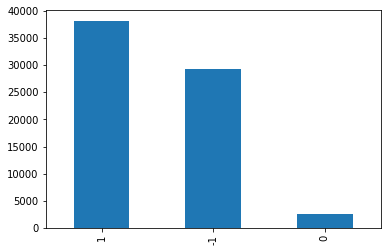

In [ ]:
labels_count = train.label.value_counts()
labels_count.plot(kind="bar")
print(train.label.value_counts())

In [ ]:
train.label.value_counts()

 1    38239
-1    29295
 0     2466
Name: label, dtype: int64

In [ ]:
train['text'].apply(lambda x: len(x)).describe()

count    70000.000000
mean        54.924743
std         84.292720
min          3.000000
25%         19.000000
50%         33.000000
75%         62.000000
max       9629.000000
Name: text, dtype: float64

In [ ]:
train.isnull().sum()

ID       0
text     0
label    0
dtype: int64

In [ ]:
test['text'].apply(lambda x: len(x)).describe()

count    30000.000000
mean        60.031067
std         92.991510
min          3.000000
25%         21.000000
50%         36.000000
75%         67.000000
max       6270.000000
Name: text, dtype: float64

In [ ]:
test["text"]=test['text'].apply(lambda x :removeDuplicates(list(x.rstrip())))

In [ ]:
test.head()

,ID,text
0,2DDHQW9,barcha aindou fiha hak w barcha teflim kadhalik
1,5HY6UEY,ye gernabou ye 9a7ba
2,ATNVUJX,saber w bara rabi m3ak 5ouya
3,Q9XYVOQ,cha3éb ta7an tfouh
4,TOAHLRH,rabi y5alihoulek w yfar7ek bih w inchalah itch...


In [ ]:

if torch.cuda.is_available():       
    device = torch.device("cuda")
    print(f'There are {torch.cuda.device_count()} GPU(s) available.')
    print('Device name:', torch.cuda.get_device_name(0))

else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
Device name: Tesla T4


In [ ]:
import fasttext
f=open('/content/drive/MyDrive/pcd/testing.txt', 'w+')
for i in train.index :
  f.write(str (train.text[i])+'\n')
f.close() 

In [ ]:
fasttext_model = fasttext.train_unsupervised(input='/content/drive/MyDrive/pcd/testing.txt', model='skipgram', dim=50,thread=4)
print(fasttext_model.words)   # list of words in dictionary
fasttext_model.get_word_vector("the")
fasttext_model.save_model('/content/drive/MyDrive/pcd/model.bin')

['</s>', 'w', 'ya', 'fi', 'rabi', 'el', 'slim', 'h', 'si', 'bravo', 'kol', 'eli', 'alah', 'l', 'ca', 'bech', 'm3ak', 'ma', '3la', 'ken', 'la', 'slouma', 'men', 'il', 'ou', 'a', 'le', 'ama', 'barcha', 'b', 'mabrouk', 'et', 'ili', 'mala', 'enti', 'tounes', 'min', '3ala', 'brabi', 'dima', 'fih', 'tawa', 'ki', 'm3alem', 'f', 'wa', 'nchalah', 'fil', 'we', 'wala', 'li', 'riahi', 'y', 'ena', 'les', 'chay', 'bara', 'mouch', 'walah', 'de', '3lik', 'c', 'ti', 'club', 'ana', 'ala', 'inchalah', '3am', 'ye', 'm3a', 'fel', 'taw', '5ir', '7ata', 'chkoun', 'kan', 'kima', 'rajel', 'haka', 'kif', 'en', 'al', '3al', 'wlh', 'inti', 'o', 'nes', 'bel', 'a7na', 'mta3', 'fama', 'lkol', 'wel', 'j', '7aja', 'fik', 'est', 'cha3b', 'mel', 'flous', 'ben', 'howa', '10', 'm', 'lel', 'd', 'hal', 'bon', 'mais', 'tunis', 'mak', 'merci', 'rak', 'je', 'fiha', 'hata', '3lina', 'n', 'tounis', 'jam3iya', 'belehi', 'bled', 'rana', '3lih', 'dawla', 'un', 'khir', 'bien', 't', '5ater', 'pas', 'hedha', 'wela', 'bi', 'haja', 'mar

In [ ]:
from fasttext import load_model

# original BIN model loading
f = load_model('/content/drive/MyDrive/pcd/model.bin')
lines=[]

# get all words from model
words = f.get_words()

with open('/content/drive/MyDrive/pcd/modelvec.vec','w') as file_out:
    
    # the first line must contain number of total words and vector dimension
    file_out.write(str(len(words)) + " " + str(f.get_dimension()) + "\n")

    # line by line, you append vectors to VEC file
    for w in words:
        v = f.get_word_vector(w)
        vstr = ""
        for vi in v:
            vstr += " " + str(vi)
        try:
            file_out.write(w + vstr+'\n')
        except:
            pass


In [ ]:
from nltk.tokenize import word_tokenize
from collections import defaultdict

def tokenize(texts):
    """Tokenize texts, build vocabulary and find maximum sentence length.
    
    Args:
        texts (List[str]): List of text data
    
    Returns:
        tokenized_texts (List[List[str]]): List of list of tokens
        word2idx (Dict): Vocabulary built from the corpus
        max_len (int): Maximum sentence length
    """

    max_len = 0
    tokenized_texts = []
    word2idx = {}

    # Add <pad> and <unk> tokens to the vocabulary
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1

    # Building our vocab from the corpus starting from index 2
    #need to change the text like in text cleaning!!!
    idx = 2
    for sent in texts:
      
        tokenized_sent = word_tokenize(sent)

        # Add `tokenized_sent` to `tokenized_texts`
        tokenized_texts.append(tokenized_sent)

        # Add new token to `word2idx`
        for token in tokenized_sent:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1

        # Update `max_len`
        max_len = max(max_len, len(tokenized_sent))

    return tokenized_texts, word2idx, max_len

def encode(tokenized_texts, word2idx, max_len):
    """Pad each sentence to the maximum sentence length and encode tokens to
    their index in the vocabulary.

    Returns:
        input_ids (np.array): Array of token indexes in the vocabulary with
            shape (N, max_len). It will the input of our CNN model.
    """

    input_ids = []
    for tokenized_sent in tokenized_texts:
        # Pad sentences to max_len
        tokenized_sent += ['<pad>'] * (max_len - len(tokenized_sent))

        # Encode tokens to input_ids
        input_id = [word2idx.get(token) for token in tokenized_sent]
        input_ids.append(input_id)
    
    return np.array(input_ids)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from tqdm import tqdm_notebook

def load_pretrained_vectors(word2idx, fname):
    """Load pretrained vectors and create embedding layers.
    
    Args:
        word2idx (Dict): Vocabulary built from the corpus
        fname (str): Path to pretrained vector file

    Returns:
        embeddings (np.array): Embedding matrix with shape (N, d) where N is
            the size of word2idx and d is embedding dimension
    """

    print("Loading pretrained vectors...")
    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    
    # Initilize random embeddings
    embeddings = np.random.uniform(-0.25, 0.25, (len(word2idx), d))
    embeddings[word2idx['<pad>']] = np.zeros((d,))

    # Load pretrained vectors
    count = 0
    for line in tqdm_notebook(fin):
        tokens = line.rstrip().split(' ')
        word = tokens[0]

        if word in word2idx:
            count += 1
            embeddings[word2idx[word]] = np.array(tokens[1:], dtype=np.float32)

    print(f"There are {count} / {len(word2idx)} pretrained vectors found.")

    return embeddings
print("Tokenizing...\n")
tokenized_texts, word2idx, max_len = tokenize(train.text)
input_ids = encode(tokenized_texts, word2idx, max_len)

# Load pretrained vectors
embeddings = load_pretrained_vectors(word2idx, "/content/drive/MyDrive/pcd/modelvec.vec")
embeddings = torch.tensor(embeddings)
print(embeddings)

Tokenizing...

Loading pretrained vectors...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



There are 13375 / 125817 pretrained vectors found.
tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0829,  0.1356,  0.2472,  ...,  0.0673, -0.2433, -0.1551],
        [-0.6742,  0.0118, -0.4652,  ...,  0.6503,  0.4270,  0.7096],
        ...,
        [ 0.1010,  0.0317,  0.0658,  ..., -0.0789,  0.2390, -0.2216],
        [ 0.0803,  0.1743,  0.0393,  ...,  0.0835, -0.0266,  0.1147],
        [ 0.0965, -0.0326, -0.1733,  ...,  0.0995,  0.0923,  0.1432]],
       dtype=torch.float64)


In [ ]:
from torch.utils.data import (TensorDataset, DataLoader, RandomSampler,
                              SequentialSampler)
from sklearn.model_selection import train_test_split

# Train Test Split
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    input_ids, train.label, test_size=0.1, random_state=2)


# Load data to PyTorch DataLoader

train_inputs, val_inputs, train_labels, val_labels =\
tuple(torch.tensor(data) for data in
      [train_inputs, val_inputs, train_labels.values, val_labels.values])

# Specify batch_size
batch_size = 100

# Create DataLoader for training data
train_data = TensorDataset(train_inputs, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create DataLoader for validation data
val_data = TensorDataset(val_inputs, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)



In [ ]:
import torch.nn as nn
class SentimentNet(nn.Module):
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        super(SentimentNet, self).__init__()
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(embeddings)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.dropout = nn.Dropout(drop_prob)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, hidden):
        batch_size = x.size(0)
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)
        out = self.sigmoid(out)
        
        out = out.view(batch_size, -1)
        out = out[:,-1]
        return out, hidden
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [ ]:
from torch import optim

vocab_size = len(word2idx) 
output_size = 1
embedding_dim = 50
hidden_dim = 512
n_layers = 2

model = SentimentNet(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
model.to(device)

lr=0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
epochs = 2
counter = 0
print_every = 500
clip = 5
valid_loss_min = np.Inf
model.to(device)
model.train()
for i in range(epochs):
    h = model.init_hidden(batch_size)
    
    for inputs, labels in train_dataloader:
        counter += 1
        h = tuple([e.data for e in h])
        inputs, labels = inputs.to(device), labels.to(device)
        model.zero_grad()
        output, h = model(inputs, h)
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        
        if counter%print_every == 0:
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inp, lab in val_dataloader:
                val_h = tuple([each.data for each in val_h])
                inp, lab = inp.to(device), lab.to(device)
                out, val_h = model(inp, val_h)
                val_loss = criterion(out.squeeze(), lab.float())
                val_losses.append(val_loss.item())
                
            model.train()
            print("Epoch: {}/{}...".format(i, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
            if np.mean(val_losses) <= valid_loss_min:
                torch.save(model.state_dict(), '/content/drive/MyDrive/pcd/state_dict.pt')
                print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,np.mean(val_losses)))
                valid_loss_min = np.mean(val_losses)

Epoch: 0/2... Step: 500... Loss: 0.027634... Val Loss: 0.371011
Validation loss decreased (inf --> 0.371011).  Saving model ...
Epoch: 1/2... Step: 1000... Loss: 0.270266... Val Loss: 0.370965
Validation loss decreased (0.371011 --> 0.370965).  Saving model ...


In [ ]:
# Loading the best model
model.load_state_dict(torch.load('/content/drive/MyDrive/pcd/state_dict.pt'))
val_losses = [] # track loss
num_correct = 0
# init hidden state
h = model.init_hidden(batch_size)
model.eval()
# iterate over test data
for inputs, labels in val_dataloader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])
   # print("la valeur de h: \n",h)

    inputs, labels = inputs.to(device), labels.to(device)
    
    # get predicted outputs
    output, h = model(inputs, h)
    
    # calculate loss
    val_loss = criterion(output.squeeze(), labels.float())
    val_losses.append(val_loss.item())
    #print(val_loss.item())
    
    # convert output probabilities to predicted class (0 or 1 or 2)
    pred = torch.argmax(output,dim=0, keepdim=True)
    # compare predictions to true label
    correct_tensor = pred.eq(labels.long().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) 
    num_correct += np.sum(correct)

# -- Statistiques! - ##
# avg test loss
print("validation loss: {:.3f}%".format(np.mean(val_losses)))

RuntimeError: ignored

In [ ]:
def prepare_submission():


    test_data = test['text']
    test_id = test['id']

    tokenized_texts, word2idx, max_len = tokenize(train.text)
    test_final = encode(tokenized_texts, word2idx, max_len)
    result_final = model.predict(test_final)
    dataf = pd.DataFrame(data = {'id' : test_id ,'text': testset['text'], 'POSITIVE' : result_final[:,0] ,'neutral' : result_final[:,1] ,'NEGATIVE' : result_final[:,2]  } })
    dataf.to_csv('resultpytorchLSTM.csv')